### 청년 주택 데이터 시각화  
>   전월세와 청년 주택(LH, SH, 안심)

In [1]:
import sqlalchemy

from urllib import parse
user = 'encore1'
password = 'EnCore1!@#'
host='13.125.65.37'
port = 3306
database = 'encore1'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")


In [2]:
import pandas as pd

df = pd.read_sql("select * from AverageGu", con=engine)
hangbok_df = df[df['kindRental'].str.find('매입임대') == -1].copy()
maeib_df = df[~df['kindRental'].str.find('매입임대') == -1].copy()
hangbok_value= hangbok_df.sort_values(by=['adresGu'])['Average'].tolist()
maeib_value= maeib_df.sort_values(by=['adresGu'])['Average'].tolist()
categories_hangbok = sorted(hangbok_df['adresGu'].unique())
categories_maeib = sorted(maeib_df['adresGu'].unique())

In [3]:
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname= font_path).get_name()
rc('font',family= font_name)

In [4]:
apart_df = pd.read_sql("""SELECT A.adresGu, ROUND(A.num/(B.num + A.num), 4)*100 AS number FROM (SELECT A.adresGu,A.AB + IFNULL(B.AB,0) AS num  FROM (SELECT adresGu, COUNT(*) AS AB 
            FROM allLh GROUP BY adresGu ORDER BY adresGu) A LEFT JOIN (SELECT adresGu, IFNULL(COUNT(*),0) 
            AS AB FROM ansim GROUP BY adresGu ORDER BY adresGu) B ON A.adresGu = B.adresGu) A 
            LEFT JOIN (SELECT adresGu, COUNT(*) as num FROM allRent GROUP BY adresGu ORDER BY adresGu) B
            ON A.adresGu = B.adresGu""", con=engine)
apart_df

,adresGu,number
0,강남구,1.05
1,강동구,4.36
2,강북구,5.34
3,강서구,1.87
4,관악구,1.43
5,광진구,1.04
6,구로구,3.72
7,금천구,3.37
8,노원구,2.61
9,도봉구,8.41


In [78]:
import folium
import requests

#for idx, row in star_df[['s_name','lat','lot']].iterrows():
#   folium.Marker(row[['lat','lot']],popup=row.s_name).add_to(fmap)


In [79]:
from shapely.geometry import Polygon, MultiPolygon
nametoloc = {}
for feature in geo_str['features']:
    geometry = feature['geometry']
    properties = feature['properties']
    
    if geometry['type'] == 'Polygon':
        polygon = Polygon(geometry['coordinates'][0])
        center = polygon.centroid.coords[0]
    elif geometry['type'] == 'MultiPolygon':
        polygon = MultiPolygon([Polygon(coord[0]) for coord in geometry['coordinates']])
        center = polygon.centroid.coords[0]
    else:
        continue
    
    # 중심점을 지도에 표시
    nametoloc[properties['name']] = (center[1],center[0])

In [80]:
nametoloc

{'강동구': (37.5471229764391, 127.14508598992767),
 '송파구': (37.501787216793105, 127.11767098515625),
 '강남구': (37.49416484281909, 127.06363635765575),
 '서초구': (37.47128023257034, 127.0319090131385),
 '관악구': (37.46422080193343, 126.94685978480372),
 '동작구': (37.497279928625645, 126.95428600842139),
 '영등포구': (37.518360407695724, 126.91075046024672),
 '금천구': (37.458453021004246, 126.90205069620028),
 '구로구': (37.49312953174027, 126.86224464738336),
 '강서구': (37.55787516442664, 126.82853679733087),
 '양천구': (37.52348431425218, 126.8573334076997),
 '마포구': (37.556176198857486, 126.91155612600662),
 '서대문구': (37.57422638600876, 126.93975273616816),
 '은평구': (37.616432243807, 126.9301147128507),
 '노원구': (37.64963623335028, 127.07810347288135),
 '도봉구': (37.66415534643971, 127.03549679644367),
 '강북구': (37.64194744427995, 127.01126143203774),
 '성북구': (37.60339492435005, 127.02256660916143),
 '중랑구': (37.59482575298258, 127.09489934718304),
 '동대문구': (37.57977931671886, 127.05744506987094),
 '광진구': (37.545274

In [123]:
all_apart_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
pd.read_sql("select * from apart_allRentView",con=engine)['자치구'].sort_values().tolist()

import json
geo_str = requests.get("https://t1.daumcdn.net/cfile/tistory/272C224C58B4BD540B").json()
apart_df = pd.read_sql("""SELECT A.adresGu, A.num AS number FROM (SELECT A.adresGu,A.AB + IFNULL(B.AB,0) AS num  FROM (SELECT adresGu, COUNT(*) AS AB 
            FROM allLh GROUP BY adresGu ORDER BY adresGu) A LEFT JOIN (SELECT adresGu, IFNULL(COUNT(*),0) 
            AS AB FROM ansim GROUP BY adresGu ORDER BY adresGu) B ON A.adresGu = B.adresGu) A""", con=engine)
folium.Choropleth(geo_str, 
                  data = apart_df, 
                  columns=['adresGu', 'number'],
                  fill_color= "PuRd",
                  key_on = 'feature.id').add_to(all_apart_map)
for idx, row in apart_df.iterrows():
    adres= row['adresGu']; numb = row['number']
    icon1 = folium.DivIcon(html=f"<div style='font-size: 10pt;font-weight:bold;width:200px'>{adres}<br>({numb}개)</div>")
    folium.Marker(location=nametoloc[row['adresGu']],icon=icon1).add_to(all_apart_map)

In [124]:
all_apart_map

In [40]:
all_apart_map.save('./map_with_text.html')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


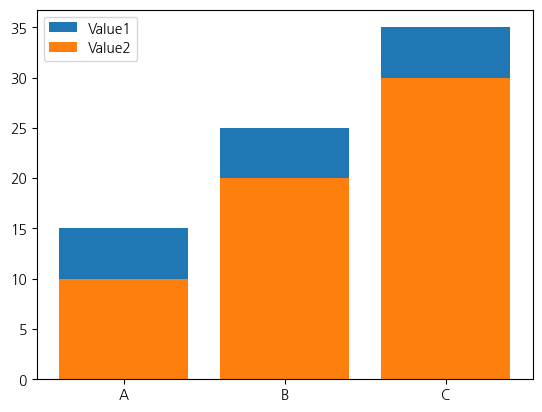

In [10]:

# 카테고리
categories = ['A', 'B', 'C']

# 값
value1 = [15, 25, 35]
value2 = [10, 20, 30]

# 막대 그래프 너비
bar_width = 0

# 첫 번째 막대 그래프의 x 좌표
bar_positions1 = np.arange(len(categories))

# 두 번째 막대 그래프의 x 좌표
bar_positions2 = bar_positions1 + bar_width

# 막대 그래프 그리기
plt.bar(bar_positions1, value1, label='Value1')
plt.bar(bar_positions2, value2, label='Value2')

# 카테고리 레이블 설정
plt.xticks(bar_positions1 + bar_width / 2, categories)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()